<h1>Импорт библиотек

In [3]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [7]:
def sum_prod(X, V):
    res = np.zeros_like(V[0])
    for i in range(len(X)):
        res += np.dot(X[i],V[i])
    return res
X = [np.array([[1, 2, 1], [3, 3, 1], [4, 6, 4]]), np.array([[1, 3, 3], [4, 5, 6], [7, 8, 9]])]
V = [np.array([[1], [3], [2]]), np.array([[5], [2], [7]])]
Expected = np.array([[ 41],[ 86],[144]])
assert np.array_equal(sum_prod(X,V),Expected),"Test failed"

<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [11]:
def binarize(matrix, threshold):
    return np.where(matrix > threshold, 1, 0)

matrix = np.array([[5, 8, 1],
                   [2, 4, 10],
                   [1, 5, 7]])

result = binarize(matrix, threshold=4)

expected_output = np.array([[1, 1, 0],
                            [0, 0, 1],
                            [0, 1, 1]])

assert np.array_equal(result, expected_output), "Test failed"


[[1 1 0]
 [0 0 1]
 [0 1 1]]


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [23]:
def unique_rows(mat):
    result = []
    for row in mat:
        unique_elements = [x for x in np.unique(row) if list(row).count(x) == 1]
        result.append(unique_elements)
    return result

def unique_columns(mat):
    result = []
    for col in np.transpose(mat):
        unique_elements = [x for x in np.unique(col) if list(col).count(x) == 1]
        result.append(unique_elements)
    return result

matrix = np.array([[1, 4, 4],
                   [2, 2, 1],
                   [1, 9, 1],])

def test_unique_rows(matrix):
    expected = [[np.int64(1)], [np.int64(1)], [np.int64(9)]]
    assert unique_rows(matrix) == expected, 'Test 1 failed'

def test_unique_columns(matrix):
    expected = [[np.int64(2)], [np.int64(2), np.int64(4), np.int64(9)], [np.int64(4)]]
    assert unique_columns(matrix) == expected, 'Test 2 failed'

test_unique_rows(matrix)
test_unique_columns(matrix)


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

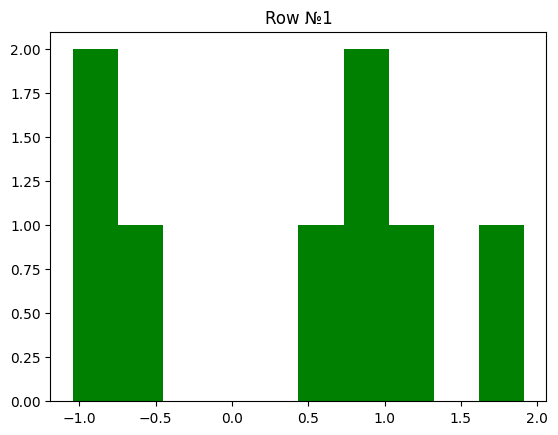

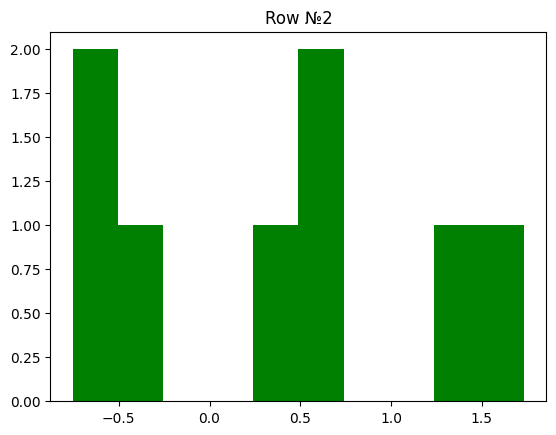

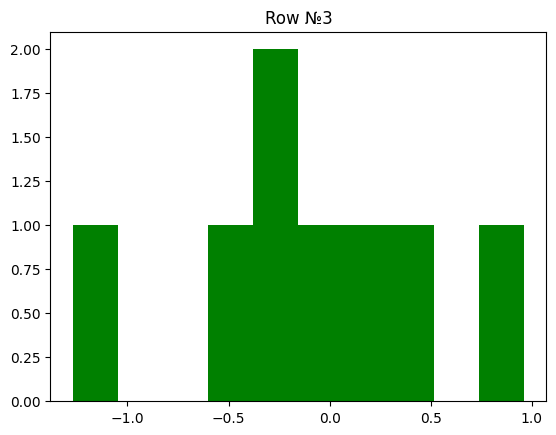

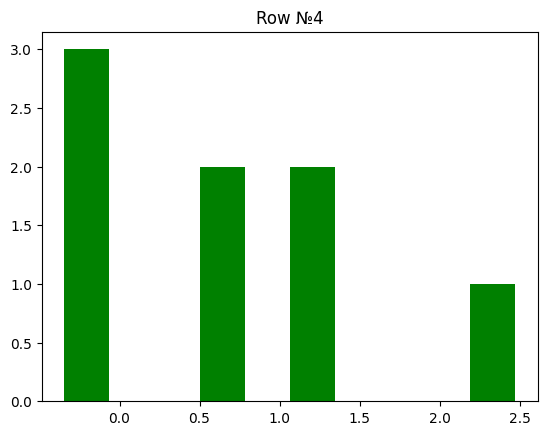

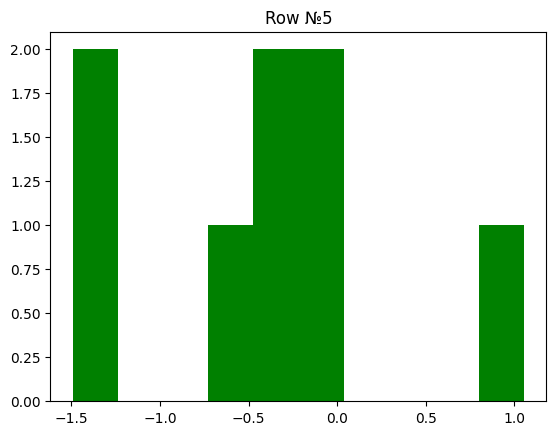

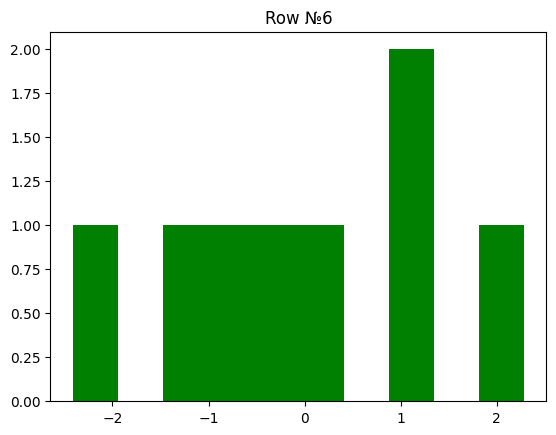

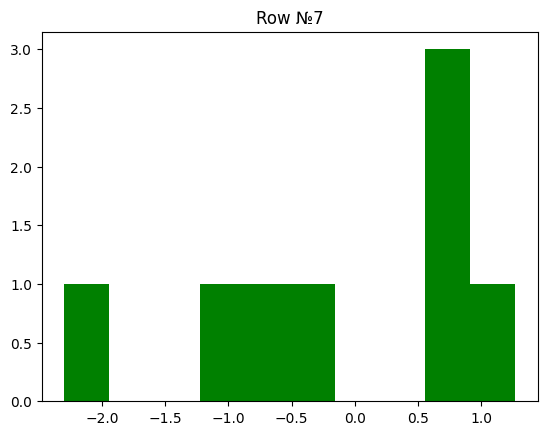

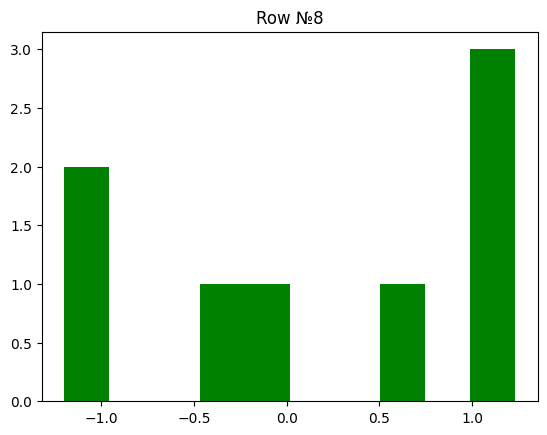

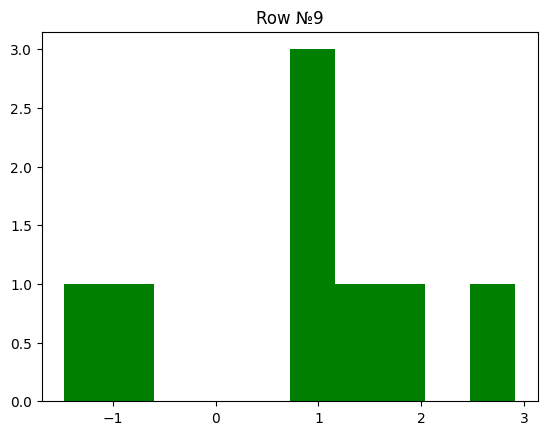

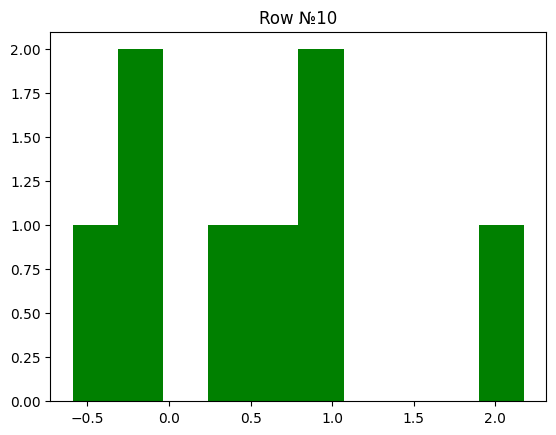

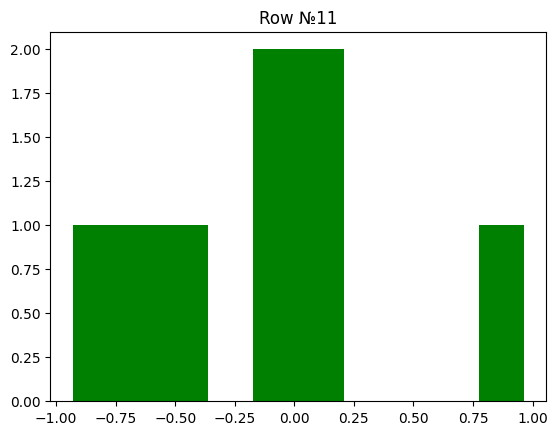

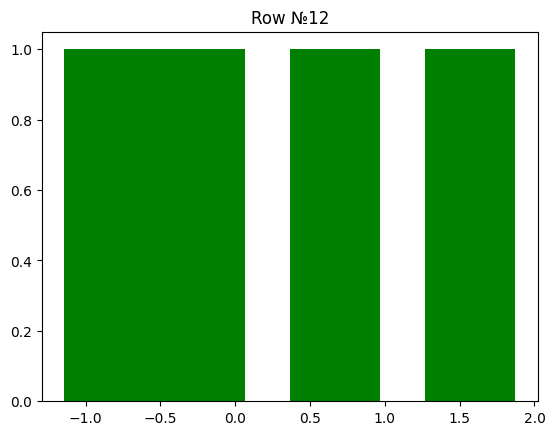

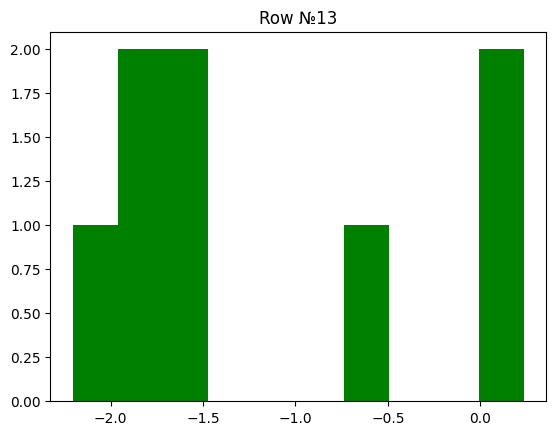

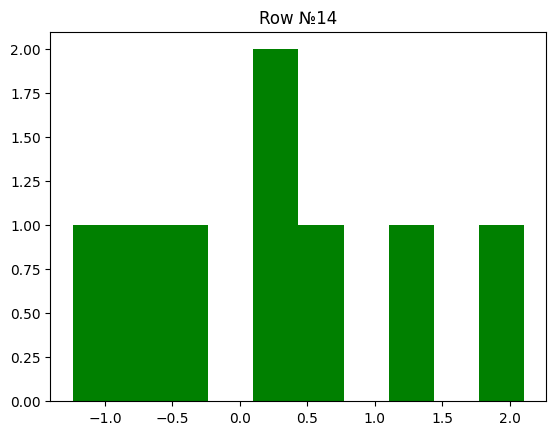

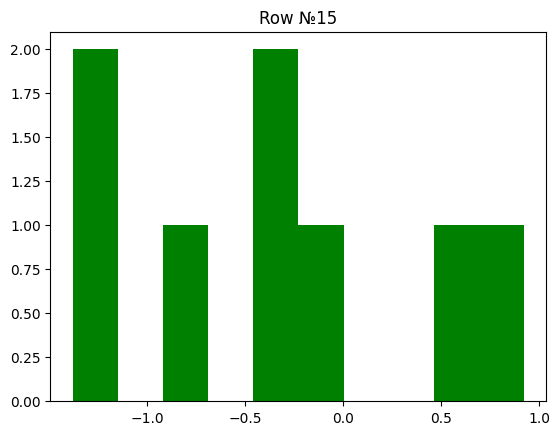

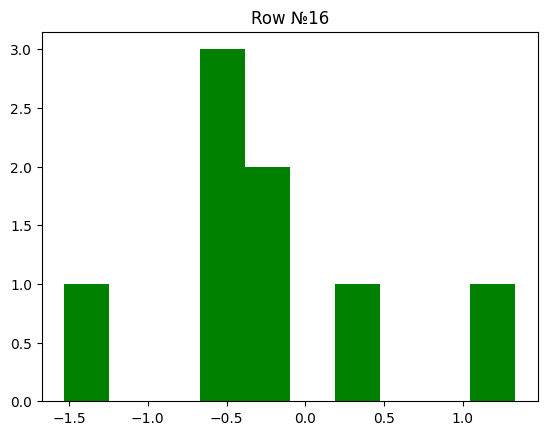

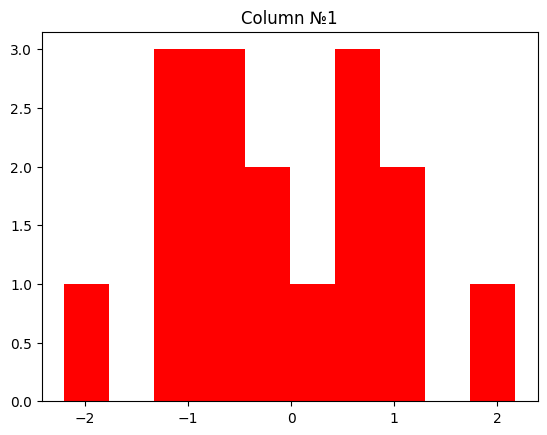

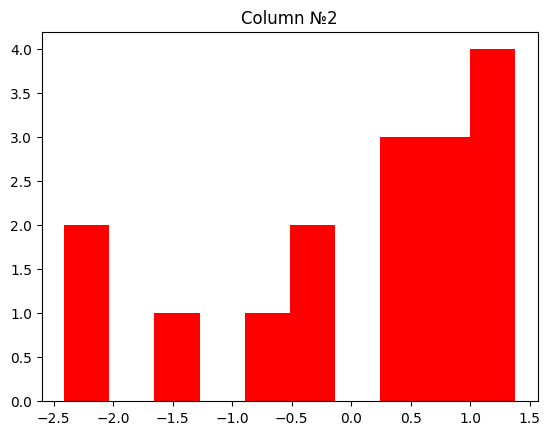

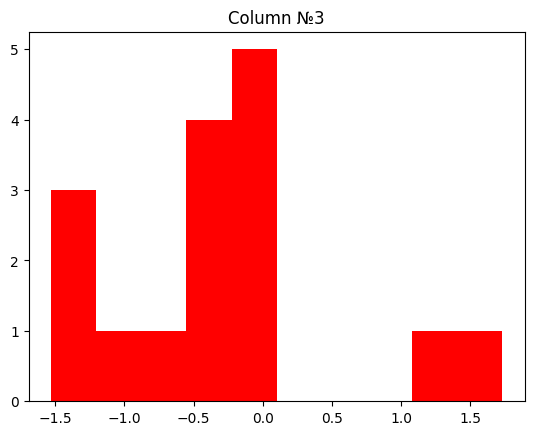

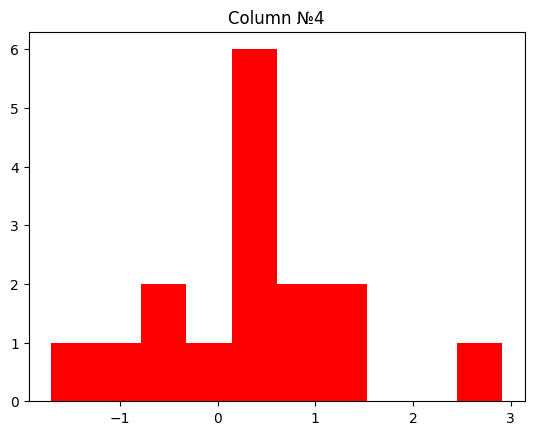

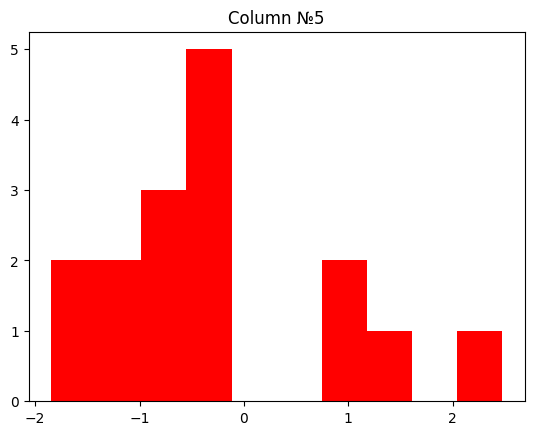

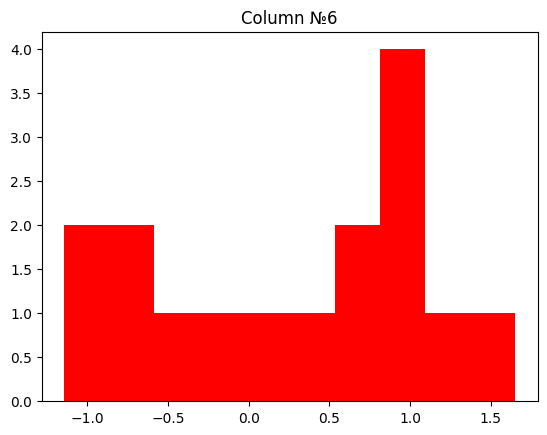

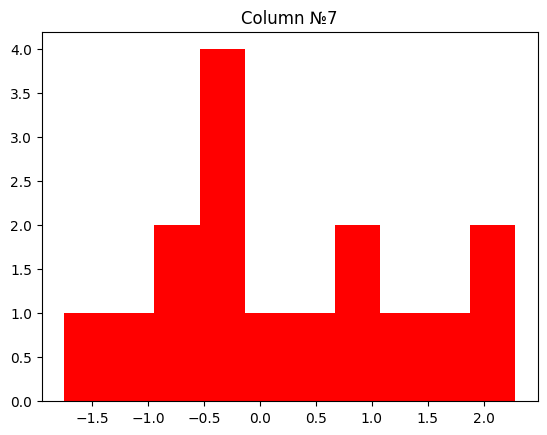

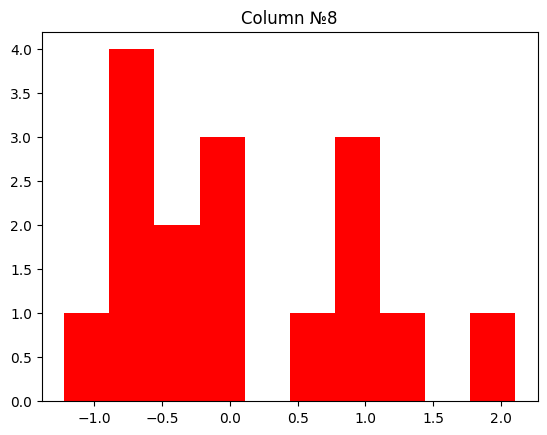

In [27]:
import numpy as np
import matplotlib.pyplot as plt
def func(m, n):
    matrix = np.random.randn(m, n)
    column_mean = np.mean(matrix, axis=0)
    row_mean = np.mean(matrix, axis=1)
    column_var = np.var(matrix, axis=0)
    row_var = np.var(matrix, axis=1)
    
    for i in range(matrix.shape[0]):
        plt.figure()
        plt.hist(matrix[i], color="green")
        plt.title(f"Row №{i+1}")
        plt.show()
        
    for i in range(matrix.shape[1]):
        plt.figure()
        plt.hist(matrix[:, i], color="red")
        plt.title(f"Column №{i+1}")
        plt.show()
        
    return column_mean, row_mean, column_var, row_var, matrix

def test_function():
    m, n = 16, 8
    column_mean, row_mean, column_var, row_var, matrix = func(m, n)
    
    assert matrix.shape == (m, n), 'Test 1 failed'
    assert column_mean.shape == (n,), 'Test 2 failed'
    assert row_mean.shape == (m,), 'Test 3 failed'
    assert column_var.shape == (n,), 'Test 4 failed'
    assert row_var.shape == (m,), 'Test 5 failed'
    

test_function()

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [28]:
def chess(m, n, a, b):
    matrix = np.zeros((m, n), dtype=object)
    for i in range(m):
        for j in range(n):
            if (i + j) % 2 == 0:
                matrix[i, j] = a
            else:
                matrix[i, j] = b
    return matrix

def test_chess():
    m, n, a, b = 4, 5, 1, 0
    expected = np.array([[1, 0, 1, 0, 1],
                         [0, 1, 0, 1, 0],
                         [1, 0, 1, 0, 1],
                         [0, 1, 0, 1, 0]])
    result = chess(m, n, a, b)
    assert np.array_equal(result, expected), 'Test 1 failed'

test_chess()


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

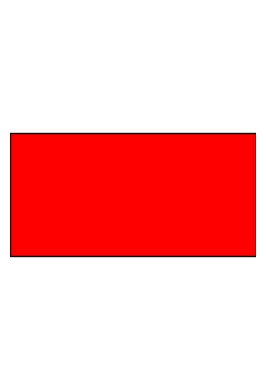

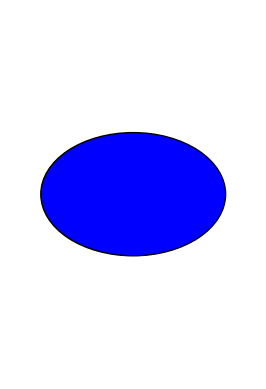

In [31]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Ellipse

def draw_rectangle(a: int, b: int, m: int, n: int, rectangle_color: str, background_color: str) -> None:
    fig, ax = plt.subplots()
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlim(0, m)
    ax.set_ylim(0, n)
    rect = Rectangle(((m - a) / 2, (n - b) / 2), a, b, edgecolor="black", facecolor=rectangle_color)
    ax.add_patch(rect)
    fig.patch.set_facecolor(background_color)
    plt.gca().invert_yaxis()
    plt.axis('off')
    plt.show()

def draw_ellipse(a: int, b: int, m: int, n: int, ellipse_color: str, background_color: str) -> None:
    fig, ax = plt.subplots()
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlim(0, m)
    ax.set_ylim(0, n)
    ellipse = Ellipse((m / 2, n / 2), a, b, edgecolor="black", facecolor=ellipse_color)
    ax.add_patch(ellipse)
    fig.patch.set_facecolor(background_color)
    plt.gca().invert_yaxis()
    plt.axis('off')
    plt.show()


draw_rectangle(20, 10, 20, 30, "red", "white")
draw_ellipse(15, 10, 20, 30, "blue", "white")


<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [32]:
def analyze_time_series(series, p):
    mean = np.mean(series)
    
    variance = np.var(series)
    
    std_deviation = np.std(series)

    local_max = []
    local_min = []
    
    for i in range(1, len(series) - 1):
        if series[i] > series[i - 1] and series[i] > series[i + 1]:
            local_max.append((i, series[i]))
        if series[i] < series[i - 1] and series[i] < series[i + 1]:
            local_min.append((i, series[i]))
    
    moving_avg = []
    for i in range(len(series) - p + 1):
        window = series[i:i + p]
        moving_avg.append(np.mean(window))
    
    return {
        'mean': mean,
        'variance': variance,
        'std_deviation': std_deviation,
        'local_max': local_max,
        'local_min': local_min,
        'moving_avg': moving_avg
    }

time_series = np.array([1, 3, 7, 1, 2, 6, 0, 1, 8, 7, 2])
p = 3

result = analyze_time_series(time_series, p)
print("Mean:", result['mean'])
print("Variance:", result['variance'])
print("Standard Deviation:", result['std_deviation'])
print("Local Maxima:", result['local_max'])
print("Local Minima:", result['local_min'])
print("Moving Average:", result['moving_avg'])

Mean: 3.4545454545454546
Variance: 7.884297520661156
Standard Deviation: 2.807899129360091
Local Maxima: [(2, np.int64(7)), (5, np.int64(6)), (8, np.int64(8))]
Local Minima: [(3, np.int64(1)), (6, np.int64(0))]
Moving Average: [np.float64(3.6666666666666665), np.float64(3.6666666666666665), np.float64(3.3333333333333335), np.float64(3.0), np.float64(2.6666666666666665), np.float64(2.3333333333333335), np.float64(3.0), np.float64(5.333333333333333), np.float64(5.666666666666667)]


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [33]:
import numpy as np

def one_hot_encoding(vector):
    num_classes = np.max(vector) + 1
    one_hot_matrix = np.zeros((len(vector), num_classes), dtype=int)
    
    for i, val in enumerate(vector):
        one_hot_matrix[i, val] = 1
        
    return one_hot_matrix

vector = np.array([0, 2, 3, 0])
one_hot_matrix = one_hot_encoding(vector)
print(one_hot_matrix)


[[1 0 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [1 0 0 0]]
